In [158]:
import os
import subprocess
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

BASE_DIR = os.path.dirname(os.path.realpath('.'))

np.random.seed(42)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [159]:
def get_titanic_dataset():
    """
    To use this function, you must create a kaggle API token
    https://github.com/Kaggle/kaggle-api
    """
    dataset_dir = os.path.join(BASE_DIR, 'datasets', 'titanic')
    train_path = os.path.join(dataset_dir, 'train.csv')
    test_path = os.path.join(dataset_dir, 'test.csv')
    
    data_exists = os.path.isfile(train_path) and os.path.isfile(test_path)
    if not data_exists:
        os.makedirs(dataset_dir, exist_ok=True)
        subprocess.check_call(['kaggle', 'competitions', 'download', '-c', 'titanic', '-p', dataset_dir])
    
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    
    df_train.columns = map(str.lower, df_train.columns)
    df_test.columns = map(str.lower, df_test.columns)
    
    X_train = df_train.drop(columns=['survived'])
    y_train = df_train['survived']
    X_test = df_test
    
    return X_train, y_train, X_test

In [160]:
X_train, y_train, X_test = get_titanic_dataset()

X_train_copy = X_train.copy()
X_train_copy['survived'] = y_train
df_train = X_train_copy

In [161]:
X_train.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
X_train.describe()

,passengerid,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
passengerid    891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [164]:
X_train['ticket'].value_counts().head()

1601        7
CA. 2343    7
347082      7
347088      6
CA 2144     6
Name: ticket, dtype: int64

In [165]:
X_train['cabin'].value_counts(dropna=False).head()

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
Name: cabin, dtype: int64

In [166]:
X_train['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [167]:
X_train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [168]:
X_train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [169]:
X_train[X_train['pclass'] == 3]['cabin'].value_counts(dropna=False).head()

NaN      479
G6         4
E121       2
F G73      2
E10        1
Name: cabin, dtype: int64

In [170]:
X_train[X_train['pclass'] == 2]['cabin'].value_counts(dropna=False).head()

NaN     168
F2        3
F33       3
E101      3
D         3
Name: cabin, dtype: int64

In [171]:
X_train[X_train['pclass'] == 1]['cabin'].value_counts(dropna=False).head()

NaN            40
C23 C25 C27     4
B96 B98         4
C22 C26         3
C78             2
Name: cabin, dtype: int64

In [172]:
y_train.value_counts()

0    549
1    342
Name: survived, dtype: int64

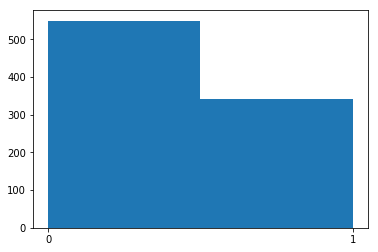

In [173]:
plt.hist(y_train, bins=2)
plt.xticks([0, 1])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d13c6a0>,
      dtype=object)

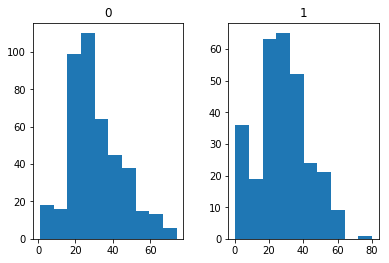

In [174]:
df_train.hist('age', by='survived', xrot=360)

In [175]:
df_train[['survived', 'sibsp', 'parch']].corr()

,survived,sibsp,parch
survived,1.000000,-0.035322,0.081629
sibsp,-0.035322,1.000000,0.414838
parch,0.081629,0.414838,1.000000


In [176]:
multi_cabin_mask = df_train['cabin'].str.contains(' ').fillna(False)
df_train[multi_cabin_mask]['cabin']

27         C23 C25 C27
75               F G73
88         C23 C25 C27
97             D10 D12
118            B58 B60
128              F E69
297            C22 C26
299            B58 B60
305            C22 C26
311    B57 B59 B63 B66
341        C23 C25 C27
390            B96 B98
435            B96 B98
438        C23 C25 C27
498            C22 C26
679        B51 B53 B55
699              F G63
700            C62 C64
715              F G73
742    B57 B59 B63 B66
763            B96 B98
789            B82 B84
802            B96 B98
872        B51 B53 B55
Name: cabin, dtype: object

In [177]:
df_train['cabin'].str[0].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object)

In [178]:
cabin_single = X_train['cabin'].str.split(' ').str[-1]

X_train['deck'] = cabin_single.str[0]
X_train['room_number'] = pd.to_numeric(cabin_single.str[1:])

In [258]:
alone_mask = (X_train['sibsp'] == 0) & (X_train['parch'] == 0)

df_train_copy = df_train.copy()
df_train_copy['alone'] = alone_mask
df_train_copy[['alone', 'survived']].corr()

,alone,survived
alone,1.000000,-0.203367
survived,-0.203367,1.000000


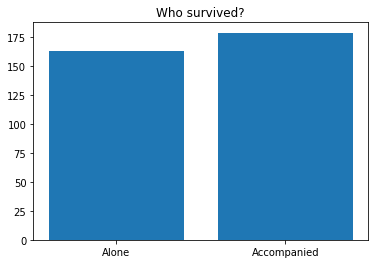

In [308]:
num_alone_survivors = (df_train_copy['alone'] & df_train_copy['survived']).sum()
num_accompanied_survivors = ((df_train_copy['alone'] == False) & df_train_copy['survived']).sum()

plt.bar(['Alone', 'Accompanied'], [num_alone_survivors, num_accompanied_survivors], align='center')
plt.title('Who survived?')
plt.show()

In [318]:
X_train['is_alone'] = (X_train['sibsp'] == 0) & (X_train['parch'] == 0)

In [179]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
res = enc.fit_transform(df_train[['sex']])
df_sex = pd.DataFrame(res, columns=enc.get_feature_names(['sex']))

pd.concat([df_train, df_sex], axis=1)[['pclass', 'survived', 'sex_male', 'sex_female']].corr()

,pclass,survived,sex_male,sex_female
pclass,1.000000,-0.338481,0.131900,-0.131900
survived,-0.338481,1.000000,-0.543351,0.543351
sex_male,0.131900,-0.543351,1.000000,-1.000000
sex_female,-0.131900,0.543351,-1.000000,1.000000


In [412]:
X_train['family_name'] = X_train['name'].str.lower().str.split(',').str[0]

In [392]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
num_cols = ['age', 'sibsp', 'parch', 'fare', 'room_number']
num_feature_names = [c.lower() for c in num_cols]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse=False))
])

cat_cols = ['pclass', 'sex', 'embarked', 'deck']
cat_pipeline.fit_transform(X_train[cat_cols])
_, enc = cat_pipeline.steps[-1]
cat_feature_names = list(enc.get_feature_names([c.lower() for c in cat_cols]))

bool_cols = ['is_alone', 'is_andersson']

train_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
    ('bool', 'passthrough', bool_cols)
])

train_pipeline_feature_names = num_feature_names + cat_feature_names + bool_cols

X_train_prep = train_pipeline.fit_transform(X_train)

In [393]:
pd.DataFrame(X_train_prep, columns=train_pipeline_feature_names).head()

,age,sibsp,parch,fare,room_number,pclass_1,pclass_2,pclass_3,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,is_alone,is_andersson
0,-0.565736,0.432793,-0.473674,-0.502445,-0.103418,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.663861,0.432793,-0.473674,0.786845,2.361621,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.103418,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.433312,0.432793,-0.473674,0.420730,4.591895,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.433312,-0.474545,-0.473674,-0.486337,-0.103418,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [394]:
pd.DataFrame(X_train_prep, columns=train_pipeline_feature_names).head()

,age,sibsp,parch,fare,room_number,pclass_1,pclass_2,pclass_3,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,is_alone,is_andersson
0,-0.565736,0.432793,-0.473674,-0.502445,-0.103418,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.663861,0.432793,-0.473674,0.786845,2.361621,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.103418,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.433312,0.432793,-0.473674,0.420730,4.591895,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.433312,-0.474545,-0.473674,-0.486337,-0.103418,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [395]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prep, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [396]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

sgd_scores = cross_val_score(sgd_clf, X_train_prep, y_train, cv=10)
sgd_scores.mean()

0.742989161275678

In [397]:
y_pred = cross_val_predict(sgd_clf, X_train_prep, y_train, cv=10)
confusion_matrix(y_train, y_pred)

array([[426, 123],
       [106, 236]])

In [398]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred)

0.6733238231098431

In [399]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train_prep, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [400]:
svm_scores = cross_val_score(svm_clf, X_train_prep, y_train, cv=10)
svm_scores.mean()

0.815937748269209

In [401]:
y_pred = cross_val_predict(svm_clf, X_train_prep, y_train, cv=10)
f1_score(y_train, y_pred)

0.7476923076923077

In [402]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train_prep, y_train, cv=10)
forest_scores.mean()

0.8138667574622632

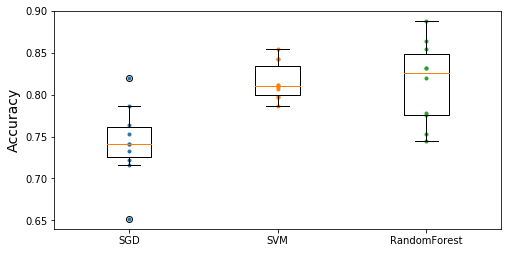

In [403]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, sgd_scores, '.')
plt.plot([2]*10, svm_scores, '.')
plt.plot([3]*10, forest_scores, '.')
plt.boxplot([sgd_scores, svm_scores, forest_scores], labels=("SGD", "SVM", "RandomForest"))
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [404]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': [3, None],
    'n_estimators': randint(1, 200),
    'max_features': randint(1, 11),
    'min_samples_split': randint(2, 11),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rand_forest_search = RandomizedSearchCV(forest_clf, param_distributions, n_iter=25, scoring='accuracy', n_jobs=-1,
                                        cv=10, verbose=True, random_state=42)
rand_forest_search.fit(X_train_prep, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    8.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.2s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'max_depth': [3, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13001c0b8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13001c9b0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12e159e10>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
      

In [405]:
rand_forest_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 9,
 'min_samples_split': 4,
 'n_estimators': 51}

In [406]:
rand_forest_search.best_score_

0.8327721661054994

In [407]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1., 3., 10., 30.],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [1, 3, 10, 30],
    'gamma': ['auto']
}

svm_grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', n_jobs=-1, cv=10, verbose=1)
svm_grid_search.fit(X_train_prep, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    9.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1.0, 3.0, 10.0, 30.0], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'degree': [1, 3, 10, 30], 'gamma': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [408]:
svm_grid_search.best_score_

0.8271604938271605